
# Sect 14 - Hypothesis Testing - T-Tests

- ~~online-ds-ft-070620~~
- 08/11/20



# Questions

# Topics / Learning Objectives

- Briefly Review: Normal distribution / Z-tests 
- Discuss Central Limit Theorem & Sampling
- The T-Distribution (and degrees of Freedom)
- Intro to AB Testing / Big-Picture Hypothesis Testing Workflow

# Resources

- **My Complete Outline / Resource Repo for Hypothesis Testing**
    - URL: https://github.com/jirvingphd/hypothesis_testing_workflow_python
    - Includes:
        - [Hypothesis Testing Slide Show (Code Academy)](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)
        - [Notebook with Full Hypothesis Testing Outline](https://nbviewer.jupyter.org/github/jirvingphd/hypothesis_testing_workflow_python/blob/master/hypothesis_testing_workflow.ipynb)
    
    
- [Hypothesis Testing Cheat Sheet](https://drive.google.com/file/d/17ePxNQdfM3OdrKEr_v0rVmivv9mNI_6I/view?usp=sharing)


# Section 14: Hypothesis Testing

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

## P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 
> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  




In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  


> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 




***When in doubt, do a 2-tailed test***

In [1]:
!pip install -U fsds
from fsds.imports import *

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

## The T-Distribution & T-Tests

- To adjust for small sample sizes, statisticians created the T-Distribution for hypothesis testing in lieu of the normal distribution.

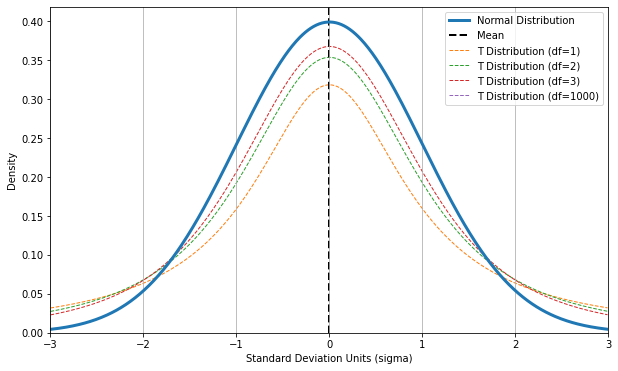

In [24]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


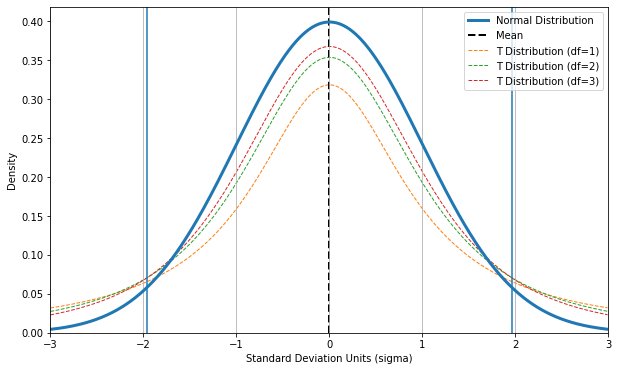

In [23]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


# Hypothesis Testing Overview (not in notebook)

- Review Code Academy Slideshow pdf
- Review Hypothesis Testing Workflow README

## Hypothesis Testing Applied: Northwind's Discounts 

### Hypothesis 1

> Do discounted items sell sell in greater/lesser quantities than full price products?

- $H_0$: Discounted items sell in similar quantities as full price items?
- $H_A$: Discounted items sell in different quantities vs full price items.

In [26]:
df['discounted'] = df['Discount'].apply(lambda x: 'Discounted' if x >0 else "Full Price")
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


In [27]:
df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [28]:
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


In [30]:
groups = df['discounted'].unique()
groups

array(['Full Price', 'Discounted'], dtype=object)

In [33]:
data = {}
for grp in groups:
    
    group_df = df.groupby('discounted').get_group(grp)['Quantity']
    data[grp] = group_df
data

{'Full Price': 0       12
 1       10
 2        5
 3        9
 4       40
         ..
 2147     2
 2148     2
 2151     1
 2153     4
 2154     2
 Name: Quantity, Length: 1317, dtype: int64, 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
         ..
 2144     2
 2146     3
 2149     2
 2150     2
 2152     2
 Name: Quantity, Length: 838, dtype: int64}

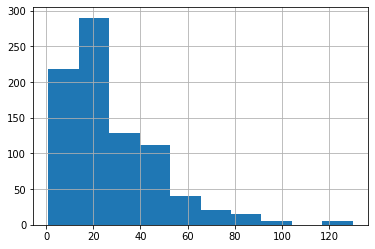

In [36]:
data['Discounted'].hist()

(array([218., 290., 129., 112.,  41.,  21.,  15.,   6.,   0.,   6.]),
 array([-1.25775482, -0.63633886, -0.0149229 ,  0.60649305,  1.22790901,
         1.84932497,  2.47074092,  3.09215688,  3.71357284,  4.3349888 ,
         4.95640475]),
 <a list of 10 Patch objects>)

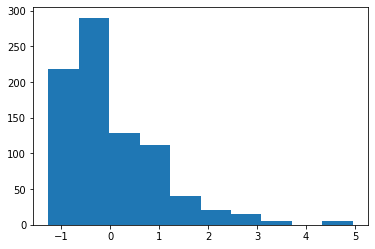

In [35]:
plt.hist(stats.zscore(data['Discounted']))

In [40]:
z_data= stats.zscore(data['Discounted'])
idx_outlier = np.abs(z_data)>3

In [42]:
data['Discounted'][~idx_outlier]

6       35
7       15
8        6
9       15
11      40
        ..
2144     2
2146     3
2149     2
2150     2
2152     2
Name: Quantity, Length: 823, dtype: int64

In [43]:
idx_outlier.sum()

15

In [44]:
for grp, grp_data in data.items():
    z_data= stats.zscore(grp_data)
    idx_outlier = np.abs(z_data)>3
    print(f"There were {idx_outlier.sum()} outliers in {grp}")
    data[grp]= grp_data[~idx_outlier]

There were 20 outliers in Full Price
There were 15 outliers in Discounted


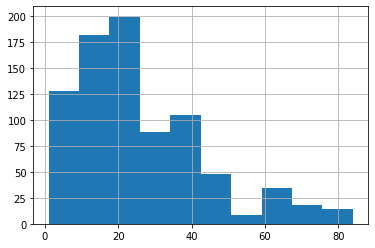

In [45]:
data['Discounted'].hist()

Results for Full Price:
 - NormaltestResult(statistic=189.4399007344143, pvalue=7.305471139042015e-42)
 - The sample is NOT normal (p<.05)
Results for Discounted:
 - NormaltestResult(statistic=113.8793478809513, pvalue=1.86815887001002e-25)
 - The sample is NOT normal (p<.05)


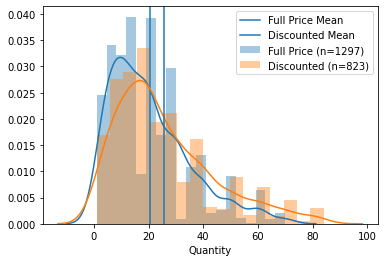

In [61]:
for grp, grp_data in data.items():
    p = test_for_normality(grp_data,label=grp,get_p=True)
    ax = sns.distplot(grp_data, label= f"{grp} (n={len(grp_data)})")
    ax.axvline(grp_data.mean(),label=f'{grp} Mean')
ax.legend()

In [57]:
res = [*list(data.values())]
res

[0       12
 1       10
 2        5
 3        9
 4       40
         ..
 2147     2
 2148     2
 2151     1
 2153     4
 2154     2
 Name: Quantity, Length: 1297, dtype: int64, 6       35
 7       15
 8        6
 9       15
 11      40
         ..
 2144     2
 2146     3
 2149     2
 2150     2
 2152     2
 Name: Quantity, Length: 823, dtype: int64]

In [53]:
stats.levene(*list(data.values()))

LeveneResult(statistic=19.187113832590878, pvalue=1.2429073348187694e-05)

In [59]:
stats.ttest_ind(*list(data.values()),equal_var=False)

Ttest_indResult(statistic=-6.879197143670148, pvalue=8.799308355281152e-12)